In [ ]:
from google.colab import drive
drive.mount('/mnt/drive', force_remount=True)
#drive.mount('/content/drive', force_remount=True)
#!ls /mnt/drive/MyDrive
# 原來是這行
#!ln -sf /mnt/drive/MyDrive/webdata templates
#現在改成下面這兩行
!ln -sf /mnt/drive/MyDrive/webdata/templates templates #加入f強迫連結
!ln -sf /mnt/drive/MyDrive/webdata/static static #加入f強迫連結
!ls templates
!pwd

Mounted at /mnt/drive
index.html
/content


In [ ]:
! pip install pyngrok
! pip install python-dotenv
! pip install flask
! pip install matplotlib
! pip install pyqrcode
! pip install pypng


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyqrcode: filename=PyQRCode-1.2.1-py3-none-any.whl size=36221 sha256=a2d4f2b6a6d14cfaf9896db14dc07676df13a977c9ee33a77a84e89635cd6f3b
  Stored in directory: /root/.cache/pip/wheels/34/2d/20/082874e49a32cdcc87ebaf99dd0099fb7774ef30f010dfb6f2
Successfully built pyqrcode
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 2.1 MB/s eta 0:00:00


/content


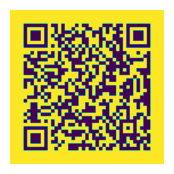

In [ ]:
import matplotlib.pyplot as plt
print(os.path.abspath('.'))

pic_name = 'myqr.png'
image=plt.imread(pic_name)

fig=plt.figure(figsize=(2,2))
_=plt.imshow(image)
_=plt.axis('off')

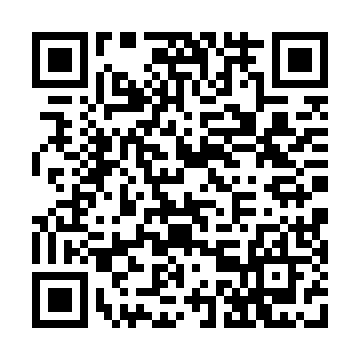

In [ ]:

from IPython.display import Image
Image('myqr.png')

In [ ]:
from flask import Flask,render_template
from pyngrok import ngrok
from google.colab import userdata
import pyqrcode
from pyqrcode import QRCode

auth_key=userdata.get('mykey')

app = Flask(__name__)

@app.route('/')
def home():
  return render_template('index.html')


ngrok.set_auth_token(auth_key)
ngrok_tunnel = ngrok.connect(5000)
print('Public URL:', ngrok_tunnel.public_url)
url = pyqrcode.create(ngrok_tunnel.public_url)
url.png('myqr.png', scale=8)
app.run()

Public URL: https://f760-35-237-8-186.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [03/Dec/2024 07:33:22] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [03/Dec/2024 07:33:22] "GET /favicon.ico HTTP/1.1" 404 -
